In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 

#Load digits dataset
digits = datasets.load_digits()


In [2]:
#Split dataset 

from sklearn.model_selection import train_test_split
import numpy as np 

#Create feature and target arrays 
X = digits.data
y = digits.target

#Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Storing accuracy for different classifiers 
classifier_accuracies = []

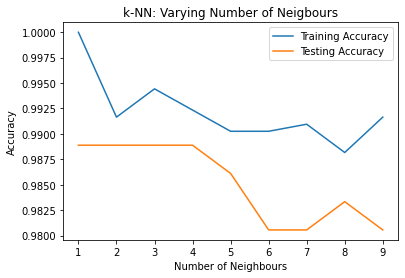

In [3]:
#kNN implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#List for number of neighbours
kneighbours = [x for x in range(1,10)]

#List for training and testing accuracies
train_accuracy = []
test_accuracy = []

for i in range(len(kneighbours)):
    #Call k nearest neighbours algorithm 
    knn = KNeighborsClassifier(n_neighbors=kneighbours[i])
    knn.fit(X_train, y_train)
    #Compute accuracy 
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

#Visualisation to k values vs accuracy 
plt.plot(kneighbours, train_accuracy, label = "Training Accuracy")
plt.plot(kneighbours, test_accuracy, label = "Testing Accuracy")
plt.title("k-NN: Varying Number of Neigbours")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [4]:
print("k = 3 is the best k, has high accuracy for both training and testing datasets")
classifier_accuracies.append(test_accuracy[2])

k = 3 is the best k, has high accuracy for both training and testing datasets


In [5]:
#Support Vector Machine 
from sklearn import svm 
from sklearn.metrics import classification_report
#Fit classifier on training data
svclassifier = svm.SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

#Make predictions 
print("Classification report for classifier SVC using linear kernel")
y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))


Classification report for classifier SVC using linear kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.97      0.95        38
           2       0.98      1.00      0.99        42
           3       1.00      0.98      0.99        43
           4       0.94      0.94      0.94        36
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        33
           8       0.92      0.89      0.90        37
           9       1.00      0.91      0.95        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [6]:
#Using Gaussian kernel

#Fit classifier on training data
svclassifier_gaussian = svm.SVC(kernel = 'rbf')
svclassifier_gaussian.fit(X_train, y_train)

#Make predictions 
print("Classification report for classifier SVC using Gaussian kernel")
y_pred = svclassifier_gaussian.predict(X_test)
print(classification_report(y_test, y_pred))


classifier_accuracies.append(accuracy_score(y_test, y_pred))

Classification report for classifier SVC using Gaussian kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        42
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        33
           8       0.97      0.95      0.96        37
           9       1.00      0.94      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [7]:
#Sigmoid Kernel 

#Fit classifier on training data
svclassifier_sig = svm.SVC(kernel = 'sigmoid')
svclassifier_sig.fit(X_train, y_train)

#Make predictions 
print("Classification report for classifier SVC using Sigmoid kernel")
y_pred = svclassifier_sig.predict(X_test)
print(classification_report(y_test, y_pred))


Classification report for classifier SVC using Sigmoid kernel
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.78      0.82      0.79        38
           2       0.97      0.93      0.95        42
           3       1.00      0.93      0.96        43
           4       0.89      0.92      0.90        36
           5       0.97      1.00      0.98        30
           6       1.00      0.97      0.99        34
           7       0.91      0.94      0.93        33
           8       0.82      0.84      0.83        37
           9       0.88      0.85      0.87        34

    accuracy                           0.91       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.91      0.91       360



In [8]:
print("Gaussian kernel should be used with 0.99 accuracy")

Gaussian kernel should be used with 0.99 accuracy


Accuracy: 0.8388888888888889


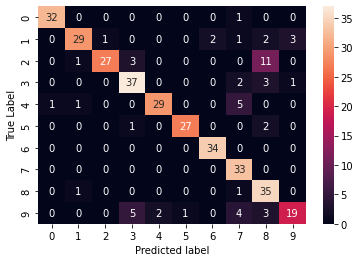

In [9]:
#Naive Bays Classifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns 

NBclassifier = GaussianNB() 
NBclassifier.fit(X_train, y_train)

y_pred = NBclassifier.predict(X_test)

map = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
map.set_xlabel("Predicted label")
map.set_ylabel("True Label")

print("Accuracy:", NBclassifier.score(X_test, y_test))
classifier_accuracies.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

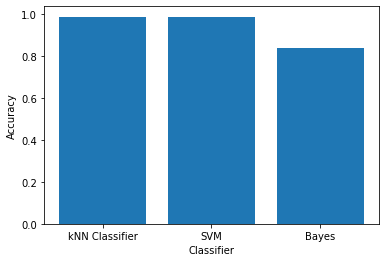

In [10]:
#Comparing the accuracy of different classifiers in the same plot 

plt.bar(['kNN Classifier', 'SVM', 'Bayes'], classifier_accuracies)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")